## Importing the Libraries

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Read the two images (image1.jpg & image2.jpg) from first assignment

In [66]:
im1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

## Helper Functions for applying the filter

In [67]:
def get_directions(kernel_shape):
    x, y = kernel_shape
    directions = []
    for i in range(x):
        for j in range(y):
            directions.append((i - x // 2, j - y // 2))
    return directions

In [68]:
def apply_filter(img, kernel):
    h, w = img.shape
    kx, ky = kernel.shape
    directions = get_directions(kernel.shape)
    output = np.zeros_like(img, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            pixel_sum = 0
            for dx, dy in directions:
                x, y = i + dx, j + dy
                if 0 <= x < h and 0 <= y < w:
                    pixel_sum += img[x, y] * kernel[dx + kx // 2, dy + ky // 2]
            output[i, j] = pixel_sum
    return output

## Defining the Kernels


In [69]:
mean_kernel = np.ones((3, 3), np.float32) / 9

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

In [70]:
def my_filter_2d(img, kernel_name):
    if kernel_name == "Mean":
        return apply_filter(img, mean_kernel)
    elif kernel_name == "Prewitt":
        p_x = apply_filter(img, prewitt_x)
        p_y = apply_filter(img, prewitt_y)
        return cv2.magnitude(p_x, p_y)
    elif kernel_name == "Robert":
        r_x = apply_filter(img, roberts_x)
        r_y = apply_filter(img, roberts_y)
        return cv2.magnitude(r_x, r_y)
    elif kernel_name == "Sobel":
        s_x = apply_filter(img, sobel_x)
        s_y = apply_filter(img, sobel_y)
        return cv2.magnitude(s_x, s_y)

In [71]:
def cv2_filter(img, kernel_name):
    if kernel_name == "Mean":
        return cv2.filter2D(img, -1, mean_kernel, borderType=cv2.BORDER_CONSTANT)
    elif kernel_name == "Sobel":
        gx_sobel_cv = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3, borderType=cv2.BORDER_CONSTANT)
        gy_sobel_cv = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3, borderType=cv2.BORDER_CONSTANT)
        return cv2.magnitude(gx_sobel_cv, gy_sobel_cv)
    k_x, ky = None, None
    if kernel_name == "Prewitt":
        k_x, k_y = prewitt_x, prewitt_y
    elif kernel_name == "Robert":
        k_x, k_y = roberts_x, roberts_y
    x = cv2.filter2D(img, cv2.CV_32F, k_x, borderType=cv2.BORDER_CONSTANT)  
    y = cv2.filter2D(img, cv2.CV_32F, k_y, borderType=cv2.BORDER_CONSTANT)
    return cv2.magnitude(x, y)

In [72]:
def compare(img, kernel_name):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(my_filter_2d(img, kernel_name), cmap="grey")
    plt.title(f"My Implementation")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2_filter(img, kernel_name), cmap="grey")
    plt.title(f"CV2 Implementation")
    plt.axis("off")

    plt.suptitle(f"Comparison of {kernel_name} Filter Results")
    plt.tight_layout()
    plt.subplots_adjust(top=0.8)
    plt.show()

In [73]:
def compare_all(img):
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap="grey")
    plt.title("Original")
    plt.axis("off")
    plt.show()
    
    compare(img, "Mean")
    compare(img, "Prewitt")
    compare(img, "Robert")
    compare(img, "Sobel")

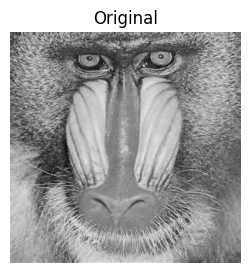

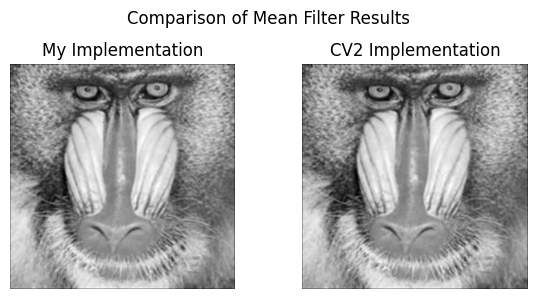

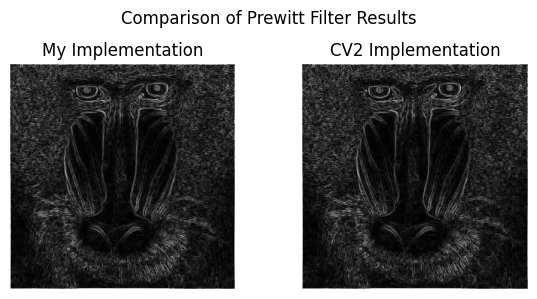

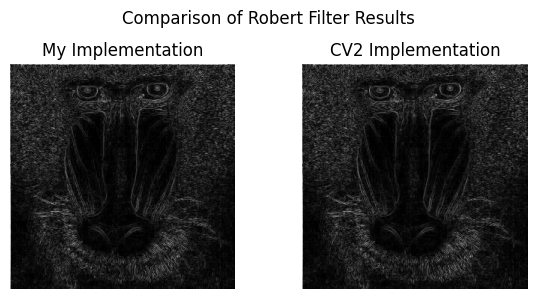

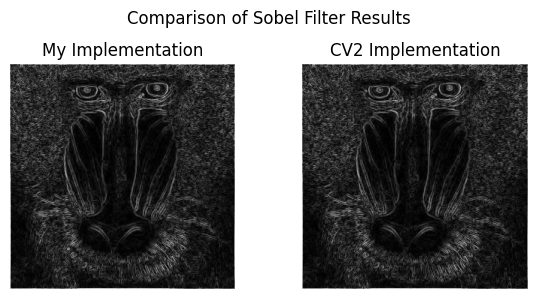

In [74]:
compare_all(im1)

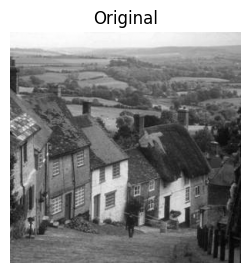

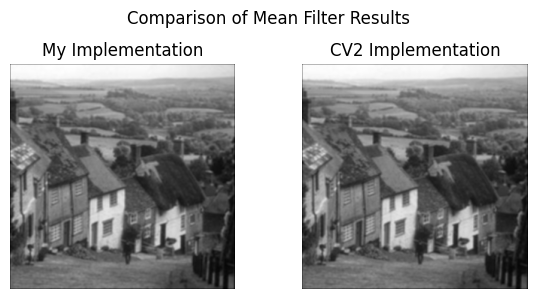

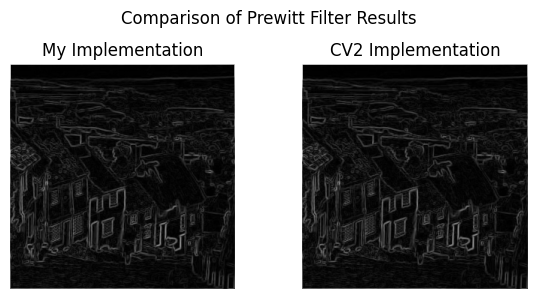

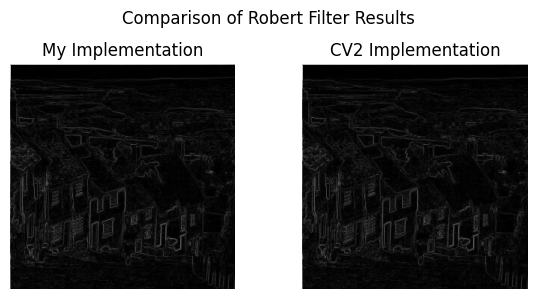

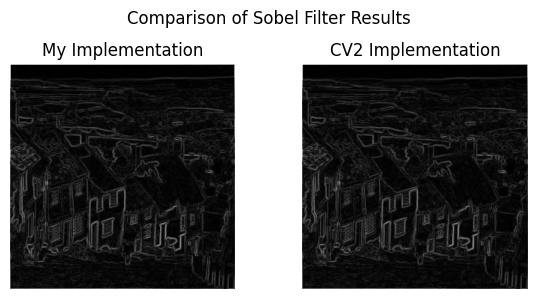

In [75]:
compare_all(im2)